Importing libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Inputting URL and converting it into a dataframe

In [29]:
url = "https://raw.githubusercontent.com/EXECiiAA/Project_2/main/diabetes.csv"
df = pd.read_csv(url)


In [30]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Creating histogram of the target variable

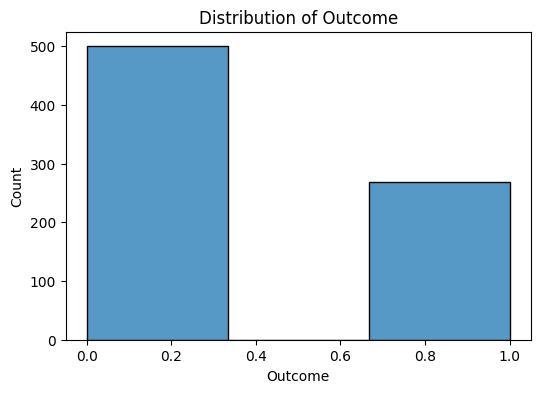

In [31]:
plt.figure(figsize=(6,4))
sns.histplot(df['Outcome'], kde=False, bins=3)
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

Correlation Heatmap

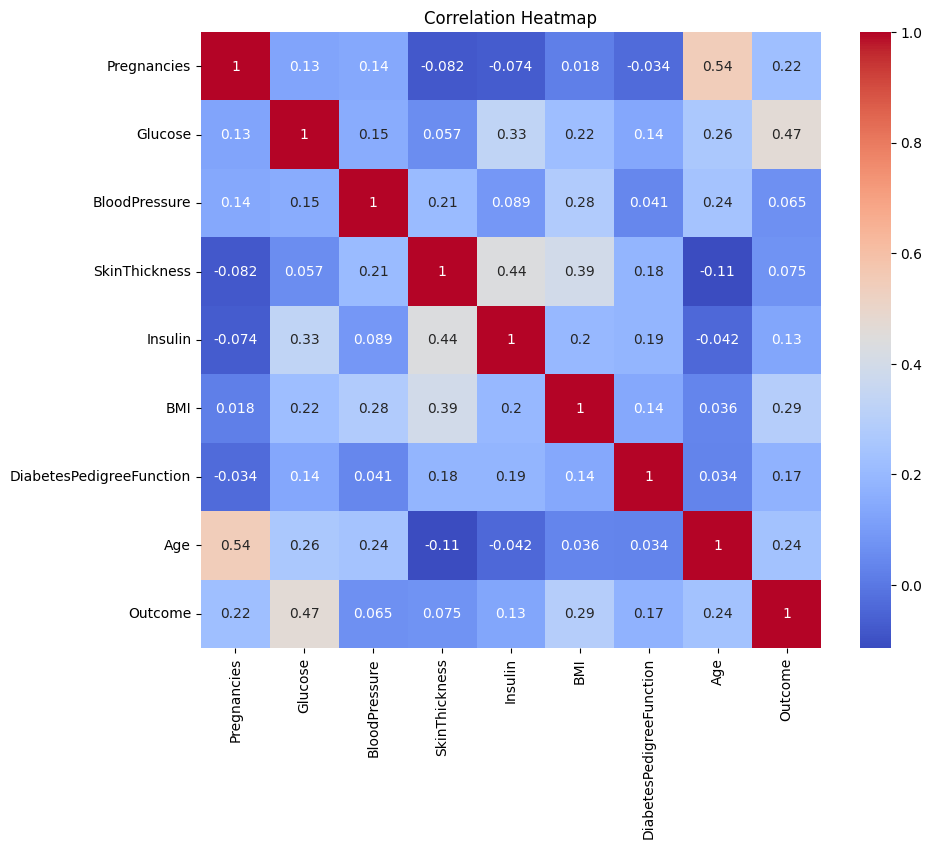

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Pairplot

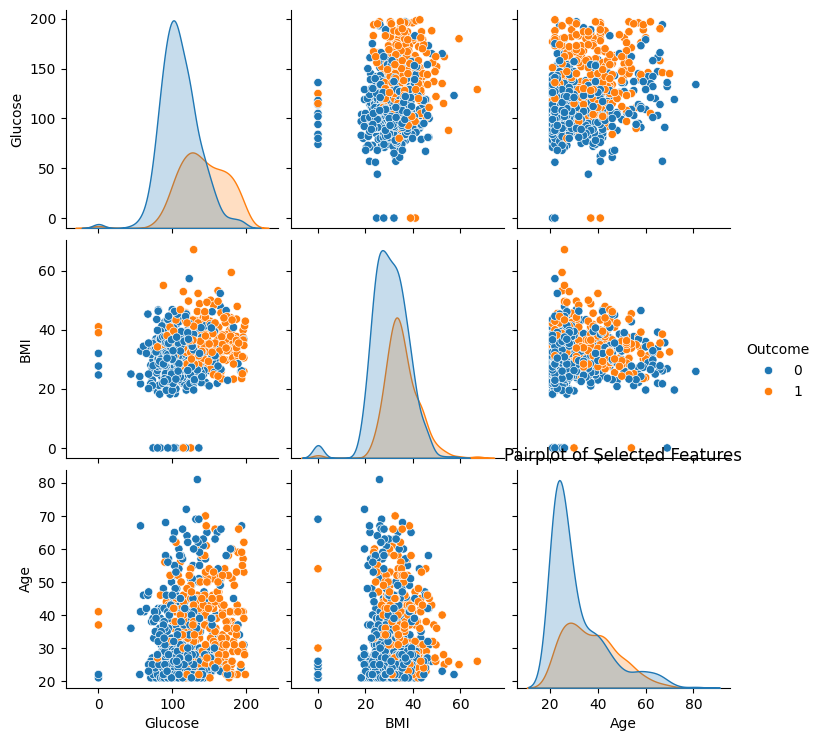

In [33]:
sns.pairplot(df, hue='Outcome', vars=['Glucose', 'BMI', 'Age'])
plt.title('Pairplot of Selected Features')
plt.show()

Dividin data into training and test sets

In [34]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Performing standardization

In [35]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Fitting the models to training data

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Initialize the models
models = {
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Fit the models
for name, model in models.items():
    model.fit(X_train, y_train)


Classification Report

In [44]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred, target_names = ['No Diabetes', 'Diabetes']))


              precision    recall  f1-score   support

 No Diabetes       0.80      0.74      0.77       151
    Diabetes       0.57      0.66      0.61        80

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.72      0.71      0.71       231



Performing 5-fold cross validation and displying it

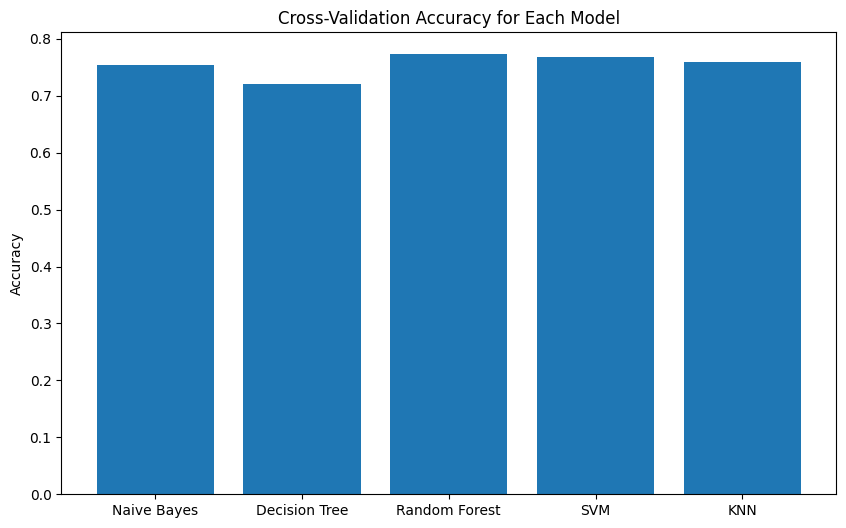

In [37]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation and record the accuracy
cv_results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    cv_results[name] = cv_scores.mean()

# Plot the cross-validation accuracy
plt.figure(figsize=(10, 6))
plt.bar(cv_results.keys(), cv_results.values())
plt.title('Cross-Validation Accuracy for Each Model')
plt.ylabel('Accuracy')
plt.show()


Making predictions uing test data

In [38]:
# Make predictions
predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_test)


Generating a classification report for each one and creating a model evaluatioon metrics

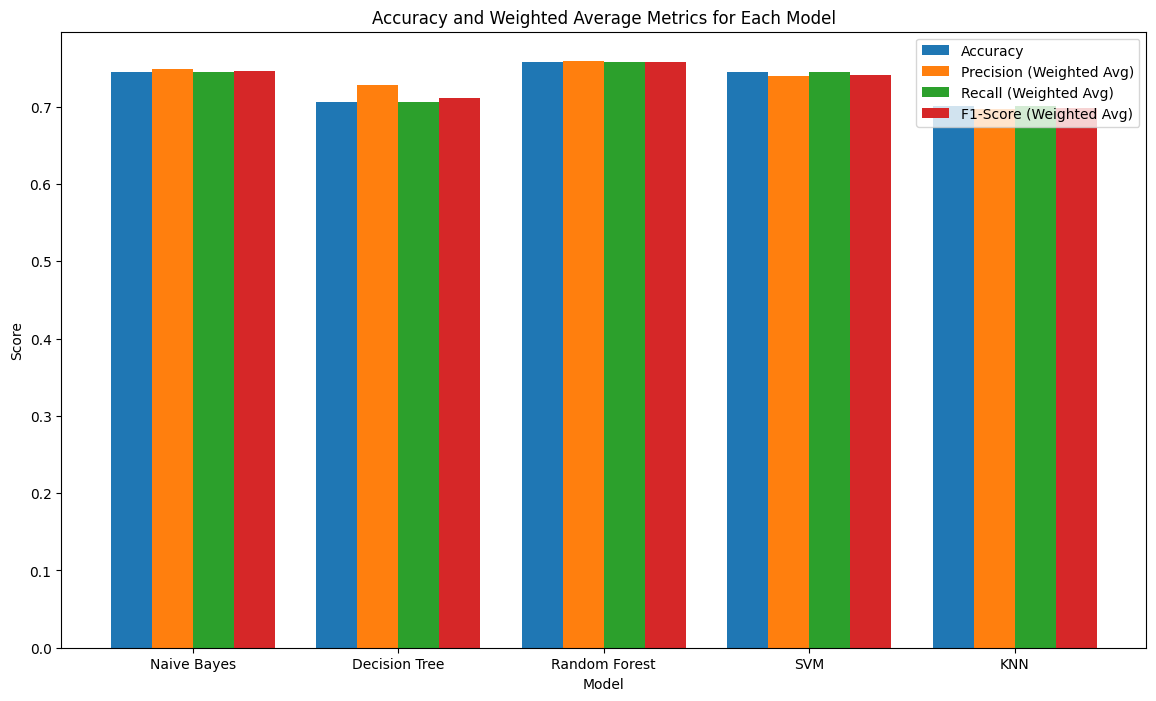

In [39]:
from sklearn.metrics import classification_report

# Generate and print classification reports
reports = {}
for name, preds in predictions.items():
    report = classification_report(y_test, preds, output_dict=True)
    reports[name] = report

# Extracting and plotting the accuracy and weighted average metrics
accuracies = [reports[name]['accuracy'] for name in reports]
weighted_avg_precision = [reports[name]['weighted avg']['precision'] for name in reports]
weighted_avg_recall = [reports[name]['weighted avg']['recall'] for name in reports]
weighted_avg_f1 = [reports[name]['weighted avg']['f1-score'] for name in reports]

# Plotting the data
labels = reports.keys()
x = range(len(labels))

plt.figure(figsize=(14, 8))

plt.bar(x, accuracies, width=0.2, label='Accuracy', align='center')
plt.bar([p + 0.2 for p in x], weighted_avg_precision, width=0.2, label='Precision (Weighted Avg)', align='center')
plt.bar([p + 0.4 for p in x], weighted_avg_recall, width=0.2, label='Recall (Weighted Avg)', align='center')
plt.bar([p + 0.6 for p in x], weighted_avg_f1, width=0.2, label='F1-Score (Weighted Avg)', align='center')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Accuracy and Weighted Average Metrics for Each Model')
plt.xticks([p + 0.3 for p in x], labels)
plt.legend()
plt.show()
